In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

crop_agriculture = pd.read_csv("D:\\FAOSTAT_data - FAOSTAT_data_en_12-29-2024.csv")


In [3]:

crop_agriculture.head()
     

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2019,2019,ha,29203.0,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2019,2019,kg/ha,1308.3,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2019,2019,t,38205.0,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2020,2020,ha,22134.0,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2020,2020,kg/ha,1775.9,A,Official figure,NaN


In [4]:

crop_agriculture.isna().sum()

Domain Code              0
Domain                   0
Area Code (M49)          0
Area                     0
Element Code             0
Element                  0
Item Code (CPC)          5
Item                     0
Year Code                0
Year                     0
Unit                     2
Value                 6517
Flag                     4
Flag Description        13
Note                219549
dtype: int64

In [5]:

crop_agriculture.count()
     

Domain Code         224647
Domain              224647
Area Code (M49)     224647
Area                224647
Element Code        224647
Element             224647
Item Code (CPC)     224642
Item                224647
Year Code           224647
Year                224647
Unit                224645
Value               218130
Flag                224643
Flag Description    224634
Note                  5098
dtype: int64

In [14]:
crop_agriculture["Element"].unique()

array(['Area harvested', 'Yield', 'Production'], dtype=object)

In [15]:

crop_agriculture.drop(crop_agriculture[crop_agriculture["Element"] == "Stocks"].index, axis=0, inplace=True)
crop_agriculture.drop(crop_agriculture[crop_agriculture["Element"] == "Producing Animals/Slaughtered"].index, axis=0, inplace=True)

crop_agriculture.drop(crop_agriculture[crop_agriculture["Element"] == "Laying"].index, axis=0, inplace=True)
crop_agriculture.drop(crop_agriculture[crop_agriculture["Element"] == "Yield/Carcass Weight"].index, axis=0, inplace=True)
crop_agriculture.drop(crop_agriculture[crop_agriculture["Element"] == "Milk Animals"].index, axis=0, inplace=True)


     

     

     

In [16]:

crop_agriculture[crop_agriculture["Flag Description"]=="Missing value (data cannot exist, not applicable)"]
     

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
1849,QCL,Crops and livestock products,8,Albania,5312,Area harvested,1349.2,Other stone fruits,2019,2019,ha,NaN,M,"Missing value (data cannot exist, not applicable)",NaN
1850,QCL,Crops and livestock products,8,Albania,5510,Production,1349.2,Other stone fruits,2019,2019,t,NaN,M,"Missing value (data cannot exist, not applicable)",NaN
1851,QCL,Crops and livestock products,8,Albania,5312,Area harvested,1349.2,Other stone fruits,2020,2020,ha,NaN,M,"Missing value (data cannot exist, not applicable)",NaN
1852,QCL,Crops and livestock products,8,Albania,5510,Production,1349.2,Other stone fruits,2020,2020,t,NaN,M,"Missing value (data cannot exist, not applicable)",NaN
1853,QCL,Crops and livestock products,8,Albania,5312,Area harvested,1349.2,Other stone fruits,2021,2021,ha,NaN,M,"Missing value (data cannot exist, not applicable)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223463,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,1351.01,Currants,2021,2021,t,NaN,M,"Missing value (data cannot exist, not applicable)",NaN
223464,QCL,Crops and livestock products,716,Zimbabwe,5312,Area harvested,1351.01,Currants,2022,2022,ha,NaN,M,"Missing value (data cannot exist, not applicable)",NaN
223465,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,1351.01,Currants,2022,2022,t,NaN,M,"Missing value (data cannot exist, not applicable)",NaN
223466,QCL,Crops and livestock products,716,Zimbabwe,5312,Area harvested,1351.01,Currants,2023,2023,ha,NaN,M,"Missing value (data cannot exist, not applicable)",NaN


In [17]:
crop_agriculture["Flag Description"].value_counts()

Flag Description
Official figure                                      91291
Estimated value                                      43396
Imputed value                                        42774
Figure from international organizations               5646
Missing value (data cannot exist, not applicable)     5140
Name: count, dtype: int64

In [18]:
#Drop missing value
crop_agriculture.drop(crop_agriculture[crop_agriculture["Flag Description"] == "Missing value (data cannot exist, not applicable)"].index, axis=0, inplace=True)
     

In [19]:
#Check there have any null value in item code and filled the null value in ORIGINAL CSV FILE
crop_agriculture[crop_agriculture['Item Code (CPC)'].isna()]
     

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
283,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,NaN,Linseed,2019,2019,NaN,1435.20,A,Official figure,NaN
441,QCL,Crops and livestock products,4,Afghanistan,5510,Production,NaN,Olive oil,2021,2021,t,1043.00,I,Imputed value,NaN
449,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,NaN,Olives,2021,2021,ha,2207.00,E,Estimated value,NaN
475,QCL,Crops and livestock products,4,Afghanistan,5510,Production,NaN,Oranges,2019,2019,t,6006.18,I,Imputed value,NaN
482,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,NaN,Oranges,2022,2022,ha,1825.00,A,Official figure,NaN


In [20]:
# Again check the null value
crop_agriculture.isna().sum()
     

Domain Code              0
Domain                   0
Area Code (M49)          0
Area                     0
Element Code             0
Element                  0
Item Code (CPC)          5
Item                     0
Year Code                0
Year                     0
Unit                     2
Value                  630
Flag                     2
Flag Description        10
Note                178100
dtype: int64

In [21]:
# Filling for null using mode
mode_area_harvested = crop_agriculture[crop_agriculture['Element'] == 'Production']['Value'].mode()[0]
crop_agriculture.loc[(crop_agriculture['Element'] == 'Production') & (crop_agriculture['Value'].isna()), 'Value'] = mode_area_harvested
     

In [22]:
# Filling for remaining null value
crop_agriculture["Value"].fillna(0,inplace = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_20364\1263729531.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crop_agriculture["Value"].fillna(0,inplace = True)


In [23]:
#Drop the unwanted columns which is not used for analysis and training 
crop_agriculture.drop(columns="Note", inplace=True)
crop_agriculture.drop(columns="Year Code", inplace=True)
crop_agriculture.drop(columns="Flag", inplace=True)
crop_agriculture.drop(columns="Flag Description", inplace=True)


In [24]:
#Check the unique value in the element for separate columns for prediction
crop_agriculture["Element"].unique()
     


array(['Area harvested', 'Yield', 'Production'], dtype=object)

In [25]:
#Separate the columns using for the LOOPS
elements = ['Area harvested', 'Yield',
           'Production']


In [26]:
for element in elements:
    Tranformed_Columns = crop_agriculture['Element'] == element
    crop_agriculture[f'{element}_Value'] = crop_agriculture['Value'].where(Tranformed_Columns, None)
     

In [27]:
#Display the separated columns
crop_agriculture.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year,Unit,Value,Area harvested_Value,Yield_Value,Production_Value
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2019,ha,29203.0,29203.0,NaN,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2019,kg/ha,1308.3,NaN,1308.3,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2019,t,38205.0,NaN,NaN,38205.0
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2020,ha,22134.0,22134.0,NaN,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2020,kg/ha,1775.9,NaN,1775.9,NaN


In [28]:
# Rename the columns with unit 
crop_agriculture = crop_agriculture.rename(columns={"Area harvested_Value": "Area_Harvested_in_Hectares"})
crop_agriculture = crop_agriculture.rename(columns={"Yield_Value": "Yield_Value in kg/ha(or)mg/Ar"})
crop_agriculture = crop_agriculture.rename(columns={"Production_Value": "Production in Tones"})

     

In [29]:
crop_agriculture.drop("Element",axis = 1,inplace = True)
crop_agriculture.drop("Value",axis = 1,inplace = True)
crop_agriculture.drop("Unit",axis = 1,inplace = True)
crop_agriculture.drop("Element Code",axis = 1,inplace = True)

In [30]:
crop_agriculture.head()

,Domain Code,Domain,Area Code (M49),Area,Item Code (CPC),Item,Year,Area_Harvested_in_Hectares,Yield_Value in kg/ha(or)mg/Ar,Production in Tones
0,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2019,29203.0,NaN,NaN
1,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2019,NaN,1308.3,NaN
2,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2019,NaN,NaN,38205.0
3,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2020,22134.0,NaN,NaN
4,QCL,Crops and livestock products,4,Afghanistan,1371,"Almonds, in shell",2020,NaN,1775.9,NaN


In [31]:
crop_agriculture = crop_agriculture.groupby(['Domain Code','Domain','Area','Area Code (M49)', 'Item','Item Code (CPC)','Year'],as_index = False).agg({'Area_Harvested_in_Hectares': 'sum',  
    'Yield_Value in kg/ha(or)mg/Ar': 'sum', 'Production in Tones': 'sum'})

In [32]:
crop_agriculture.head()

,Domain Code,Domain,Area,Area Code (M49),Item,Item Code (CPC),Year,Area_Harvested_in_Hectares,Yield_Value in kg/ha(or)mg/Ar,Production in Tones
0,QCL,Crops and livestock products,Afghanistan,4,"Almonds, in shell",1371,2019,29203.0,1308.3,38205.0
1,QCL,Crops and livestock products,Afghanistan,4,"Almonds, in shell",1371,2020,22134.0,1775.9,39307.0
2,QCL,Crops and livestock products,Afghanistan,4,"Almonds, in shell",1371,2021,36862.0,1743.2,64256.0
3,QCL,Crops and livestock products,Afghanistan,4,"Almonds, in shell",1371,2022,36462.0,1742.0,63515.0
4,QCL,Crops and livestock products,Afghanistan,4,"Almonds, in shell",1371,2023,37000.0,1810.8,67000.0


In [33]:
crop_agriculture.dtypes

Domain Code                       object
Domain                            object
Area                              object
Area Code (M49)                    int64
Item                              object
Item Code (CPC)                   object
Year                               int64
Area_Harvested_in_Hectares       float64
Yield_Value in kg/ha(or)mg/Ar    float64
Production in Tones              float64
dtype: object

In [34]:
crop_agriculture['Item Code (CPC)']=crop_agriculture['Item Code (CPC)'].replace('2351f','2351')

In [35]:
crop_agriculture['Item Code (CPC)']=crop_agriculture['Item Code (CPC)'].astype(float)

In [36]:
crop_agriculture.isna().sum()

Domain Code                      0
Domain                           0
Area                             0
Area Code (M49)                  0
Item                             0
Item Code (CPC)                  0
Year                             0
Area_Harvested_in_Hectares       0
Yield_Value in kg/ha(or)mg/Ar    0
Production in Tones              0
dtype: int64

In [37]:
crop_agriculture.count()

Domain Code                      82615
Domain                           82615
Area                             82615
Area Code (M49)                  82615
Item                             82615
Item Code (CPC)                  82615
Year                             82615
Area_Harvested_in_Hectares       82615
Yield_Value in kg/ha(or)mg/Ar    82615
Production in Tones              82615
dtype: int64

In [38]:
crop_agriculture.duplicated().sum()

np.int64(0)

In [39]:
crop_agriculture["Area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of', 'China, mainland', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', "C�te d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea',

<Axes: >

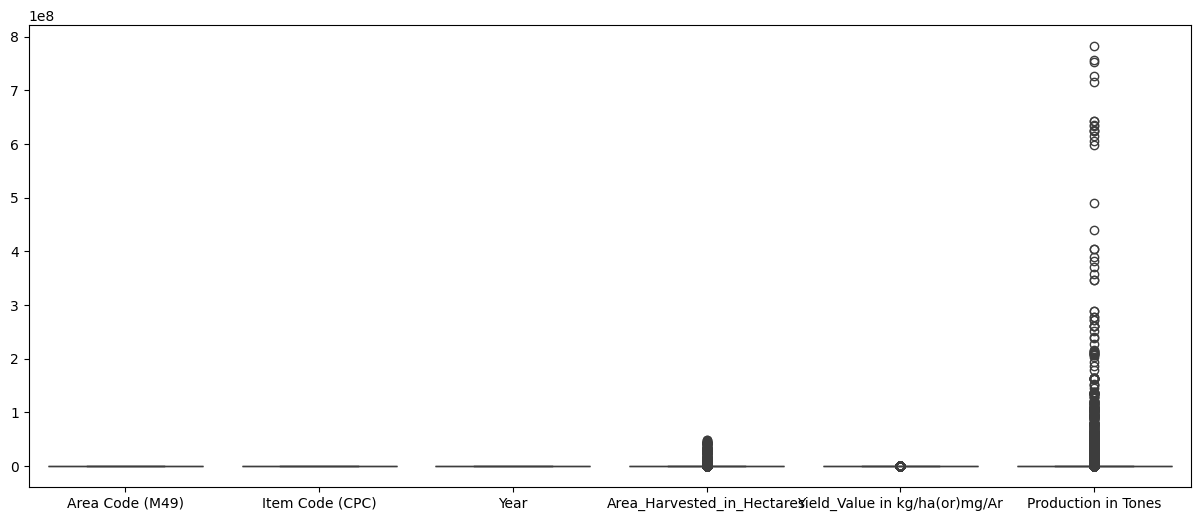

In [40]:
plt.figure(figsize=(15,6))
sns.boxplot(data=crop_agriculture)

In [41]:
#crop_agriculture["Area in sq.km"] = crop_agriculture["Area_Harvested_in_Hectares"] / 100


#crop_agriculture["Yield in t/hec"] = crop_agriculture["Yield_Value in kg/ha(or)mg/Ar"] / 1000

crop_agriculture["Production in Kilotonnes"] = crop_agriculture["Production in Tones"] / 1000

In [42]:
columns=["Production in Tones"]
crop_agriculture.drop(columns=columns,inplace=True)

<Axes: >

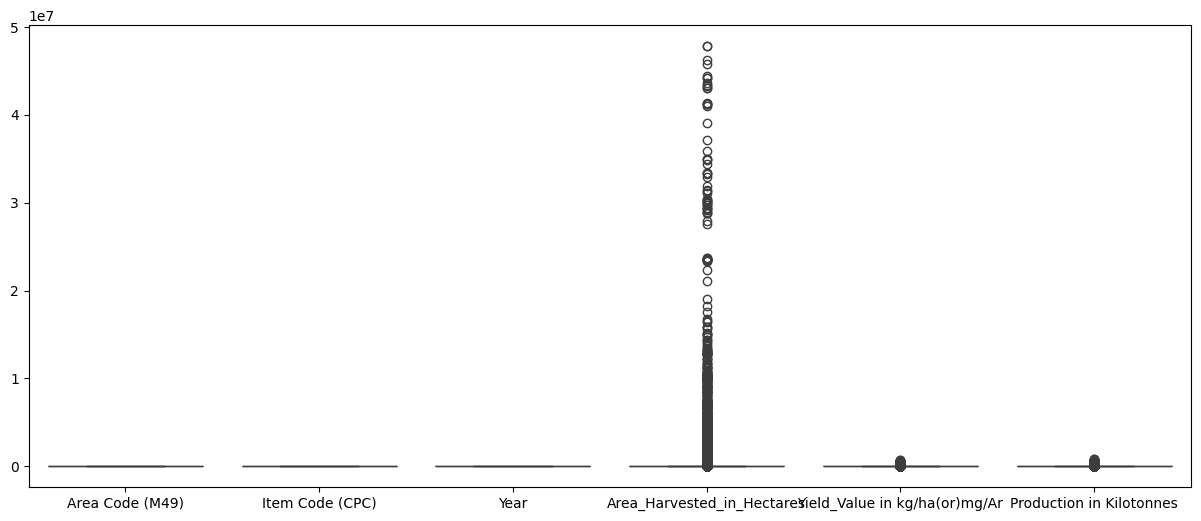

In [43]:
plt.figure(figsize=(15,6))
sns.boxplot(data=crop_agriculture)

In [44]:
columns=["Area_Harvested_in_Hectares","Yield_Value in kg/ha(or)mg/Ar","Production in Kilotonnes"]
for column in columns:
    crop_agriculture[column]=  crop_agriculture[column].round(2)

In [45]:
crop_agriculture.head()

,Domain Code,Domain,Area,Area Code (M49),Item,Item Code (CPC),Year,Area_Harvested_in_Hectares,Yield_Value in kg/ha(or)mg/Ar,Production in Kilotonnes
0,QCL,Crops and livestock products,Afghanistan,4,"Almonds, in shell",1371.0,2019,29203.0,1308.3,38.20
1,QCL,Crops and livestock products,Afghanistan,4,"Almonds, in shell",1371.0,2020,22134.0,1775.9,39.31
2,QCL,Crops and livestock products,Afghanistan,4,"Almonds, in shell",1371.0,2021,36862.0,1743.2,64.26
3,QCL,Crops and livestock products,Afghanistan,4,"Almonds, in shell",1371.0,2022,36462.0,1742.0,63.52
4,QCL,Crops and livestock products,Afghanistan,4,"Almonds, in shell",1371.0,2023,37000.0,1810.8,67.00


In [46]:
Q1 = crop_agriculture["Production in Kilotonnes"].quantile(0.25)
Q3 = crop_agriculture["Production in Kilotonnes"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (crop_agriculture["Production in Kilotonnes"]< lower_bound) | (crop_agriculture["Production in Kilotonnes"]> upper_bound)
outliers.value_counts()

Production in Kilotonnes
False    68803
True     13812
Name: count, dtype: int64

In [47]:
#crop_agriculture = crop_agriculture[~outliers]

In [48]:

crop_agriculture=crop_agriculture[crop_agriculture["Production in Kilotonnes"]!=0.00]


In [73]:
crop_agriculture.to_csv("crop.csv",index=False)

In [40]:
pip install scikit-learn 


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [76]:
x = crop_agriculture[["Area Code (M49)","Item Code (CPC)","Area_Harvested_in_Hectares","Yield_Value in kg/ha(or)mg/Ar"]]
y = crop_agriculture["Production in Kilotonnes"]

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:

scaler = StandardScaler()
scaled_x_train= scaler.fit_transform(x_train)
scaled_x_test= scaler.transform(x_test)




In [78]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [79]:
y_predit = model1.predict(x_test)

In [80]:
y_predit

array([1177.73742116,  151.03817244, -128.94605761, ...,  349.91867607,
       5051.14302902,  459.17347073], shape=(15376,))

In [81]:
mse = mean_squared_error(y_test,y_predit)

In [82]:
print(mse)

71060864.93894531


In [83]:
r2_score = model1.score(x_test,y_test)
r2_score

0.3095645368855785

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
model2 = RandomForestRegressor(n_estimators=50,random_state=42)

In [86]:
model2.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [87]:
y_predit2 = model2.predict(x_test)
y_predit2 


array([9.02434e+01, 6.00000e-02, 9.58000e-02, ..., 5.60054e+01,
       4.65179e+02, 4.30140e+01], shape=(15376,))

In [88]:
mse1 = mean_squared_error(y_test,y_predit)
print(mse1)

71060864.93894531


In [89]:
r2_score2 = model2.score(x_test,y_test)
print(r2_score2)

0.9716933544156308


In [234]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
from xgboost import XGBRegressor

In [91]:
model3=XGBRegressor()
model3.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [92]:
y_predit3=model3.predict(x_test)
y_predit3

array([-81.59392 , -68.0806  , -33.09385 , ...,  85.932396, 291.90427 ,
        65.409996], shape=(15376,), dtype=float32)

In [93]:
mse2=mean_squared_error(y_test,y_predit3)
mse2

5742554.821573411

In [94]:
r2_score3=model3.score(x_test,y_test)
r2_score3

0.9442046828292963

In [95]:
import joblib

In [98]:
joblib.dump(model2,r"D:\agriculture\model 1.pkl")

['D:\\agriculture\\model 1.pkl']

In [97]:
joblib.dump(scaler,r"D:\agriculture\scaler.pkl")

['D:\\agriculture\\scaler.pkl']